In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

print("Column names:\n", data_mcdonald.columns.tolist())

print("Shape of dataset:", data_mcdonald.shape)

print("\nFirst 3 rows:")
print(data_mcdonald.head(3))



Column names:
 ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Shape of dataset: (1453, 15)

First 3 rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
import numpy as np

md_x = data_mcdonald.iloc[:, 0:11]

md_x_bin = (md_x == "Yes").astype(int)

attribute_means = md_x_bin.mean().round(2)

print(attribute_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]

md_x_bin = (md_x == "Yes").astype(int)

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

pca = PCA()
pca.fit(md_x_bin)

explained_variance = pca.explained_variance_ratio_
std_devs = np.sqrt(pca.explained_variance_)
cumulative_variance = np.cumsum(explained_variance)

summary_df = pd.DataFrame({
    'Standard deviation': std_devs.round(4),
    'Proportion of Variance': explained_variance.round(4),
    'Cumulative Proportion': cumulative_variance.round(4)
})
summary_df.index = [f'PC{i+1}' for i in range(len(std_devs))]
print(summary_df)


      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1               0.7570                  0.2994                 0.2994
PC2               0.6075                  0.1928                 0.4922
PC3               0.5046                  0.1330                 0.6253
PC4               0.3988                  0.0831                 0.7084
PC5               0.3374                  0.0595                 0.7679
PC6               0.3103                  0.0503                 0.8182
PC7               0.2897                  0.0438                 0.8620
PC8               0.2751                  0.0395                 0.9016
PC9               0.2653                  0.0368                 0.9383
PC10              0.2488                  0.0324                 0.9707
PC11              0.2369                  0.0293                 1.0000


In [ ]:

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=md_x.columns)

print(loadings.round(2))


             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37  0.73  0.21 -0.03  0.17  0.07  0.29  0.04


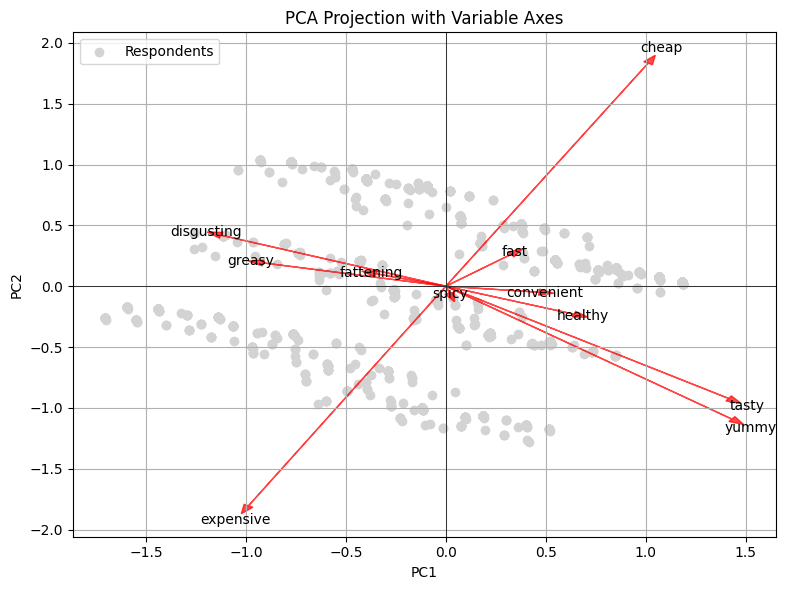

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]

md_x_bin = (md_x == "Yes").astype(int)

pca = PCA()
pca.fit(md_x_bin)

scores = pca.transform(md_x_bin)
loadings = pca.components_.T

plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], color='lightgrey', label='Respondents')

for i, var in enumerate(md_x.columns):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Variable Axes")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


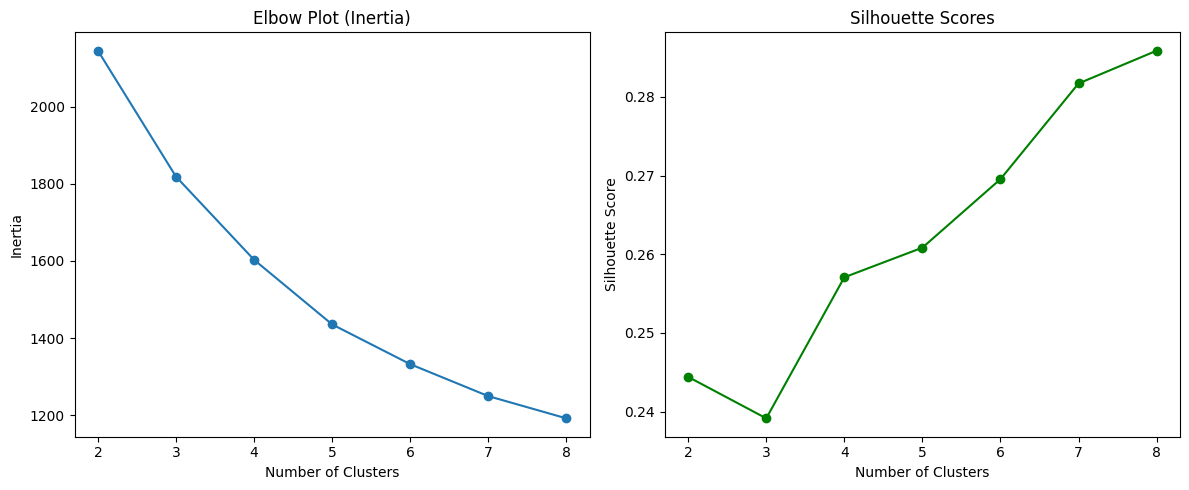

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = md_x_bin

inertias = []
silhouette_scores = []
cluster_range = range(2, 9)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Plot (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


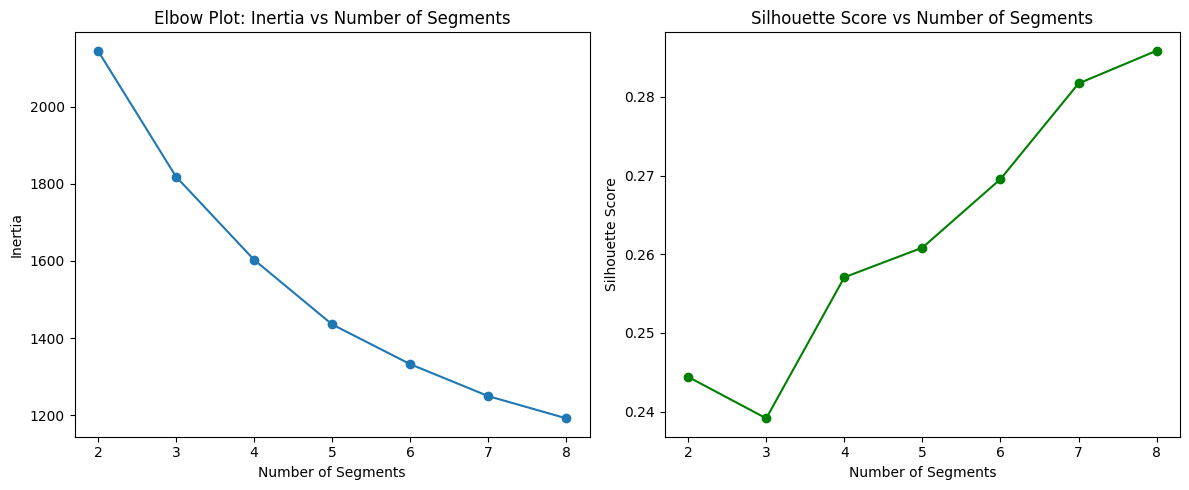

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = md_x_bin

inertias = []
silhouettes = []
cluster_range = range(2, 9)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Plot: Inertia vs Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score vs Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


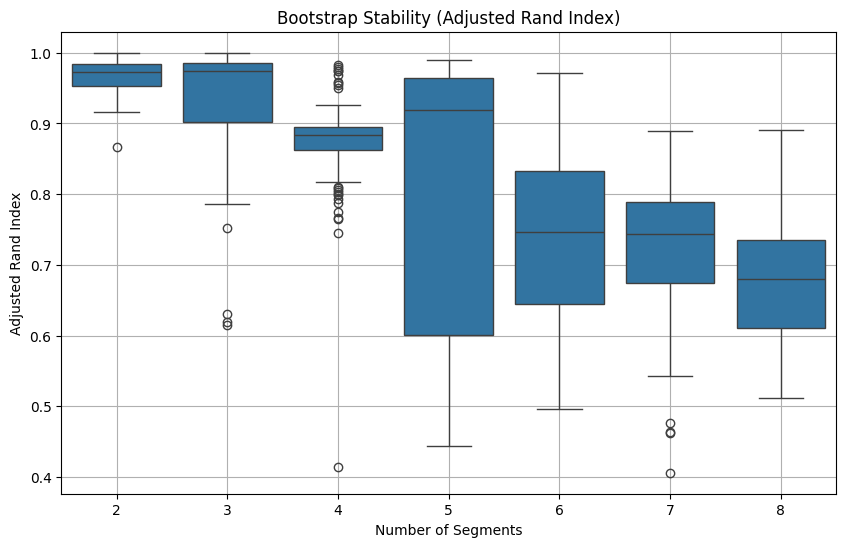

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]

md_x_bin = (md_x == "Yes").astype(int)

from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



X = md_x_bin
k_range = range(2, 9)
n_bootstraps = 100
n_init = 10
random_state = 1234

np.random.seed(random_state)
bootstrap_ari = {k: [] for k in k_range}

for k in k_range:
    kmeans_original = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    kmeans_original.fit(X)
    original_labels = kmeans_original.labels_

    for _ in range(n_bootstraps):
        bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
        X_boot = X.iloc[bootstrap_indices]

        kmeans_boot = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        kmeans_boot.fit(X_boot)

        boot_labels_on_full = kmeans_boot.predict(X)

        ari = adjusted_rand_score(original_labels, boot_labels_on_full)
        bootstrap_ari[k].append(ari)

df_ari = pd.DataFrame([
    (k, ari) for k, aris in bootstrap_ari.items() for ari in aris
], columns=["n_clusters", "ARI"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="n_clusters", y="ARI", data=df_ari)
plt.title("Bootstrap Stability (Adjusted Rand Index)")
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.grid(True)
plt.show()


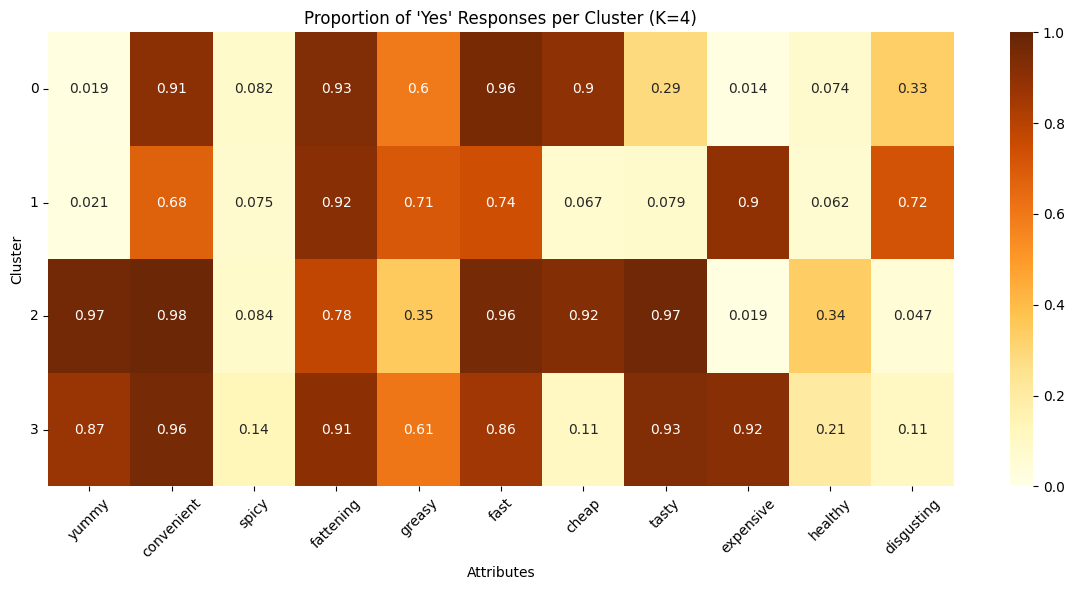

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans_4.fit_predict(md_x_bin)

md_x_bin_clustered = md_x_bin.copy()
md_x_bin_clustered["Cluster"] = cluster_labels

cluster_means = md_x_bin_clustered.groupby("Cluster").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="YlOrBr", annot=True, cbar=True, vmin=0, vmax=1)
plt.title("Proportion of 'Yes' Responses per Cluster (K=4)")
plt.xlabel("Attributes")
plt.ylabel("Cluster")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-78-199208984.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stability_matrix.T, labels=[1, 2, 3, 4])


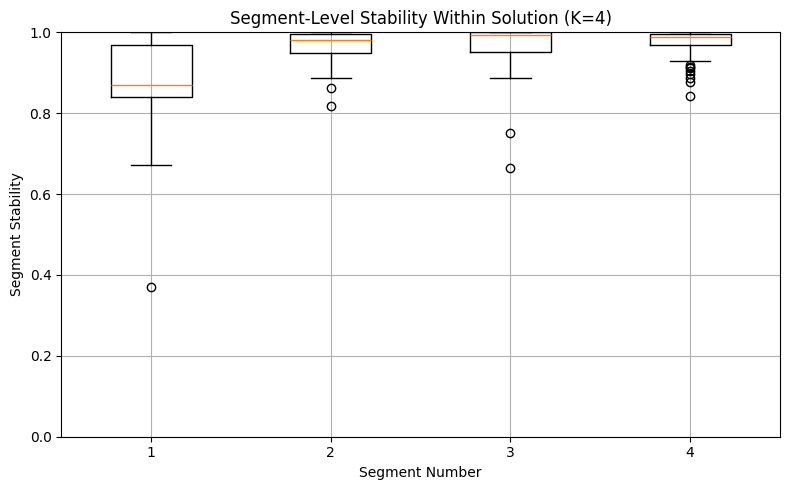

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = md_x_bin
k = 4
n_bootstraps = 100
random_state = 1234

kmeans_orig = KMeans(n_clusters=k, n_init=10, random_state=random_state)
orig_labels = kmeans_orig.fit_predict(X)

stability_matrix = np.zeros((k, n_bootstraps))

np.random.seed(random_state)
for b in range(n_bootstraps):
    indices = np.random.choice(len(X), size=len(X), replace=True)
    X_boot = X.iloc[indices]
    orig_sub = orig_labels[indices]

    kmeans_boot = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    boot_labels = kmeans_boot.fit_predict(X_boot)

    contingency = np.zeros((k, k))
    for i in range(len(orig_sub)):
        contingency[orig_sub[i], boot_labels[i]] += 1

    row_ind, col_ind = linear_sum_assignment(-contingency)

    for i in range(k):
        count = np.sum(orig_sub == row_ind[i])
        if count > 0:
            stability_matrix[row_ind[i], b] = contingency[row_ind[i], col_ind[i]] / count

segment_stability = stability_matrix.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.boxplot(stability_matrix.T, labels=[1, 2, 3, 4])
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment-Level Stability Within Solution (K=4)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = md_x_bin

results = []
models = {}

for k in range(2, 9):
    model = GaussianMixture(n_components=k, covariance_type='diag',
                            n_init=10, random_state=1234)
    model.fit(X)

    log_likelihood = model.lower_bound_ * len(X)
    aic = model.aic(X)
    bic = model.bic(X)

    probs = model.predict_proba(X)
    log_probs = np.log(probs + 1e-12)
    entropy = -np.sum(probs * log_probs)
    icl = bic - entropy

    results.append({
        "k": k,
        "logLik": log_likelihood,
        "AIC": aic,
        "BIC": bic,
        "ICL": icl,
        "iter": model.n_iter_,
        "converged": model.converged_
    })

    models[k] = model

df_lca = pd.DataFrame(results)
print(df_lca)


   k        logLik           AIC           BIC           ICL  iter  converged
0  2   9883.247793 -19676.495586 -19438.833231 -19438.833231     6       True
1  3  12899.134881 -25662.269743 -25303.135518 -25303.154108     8       True
2  4  18941.502803 -37701.035562 -37220.429467 -37223.991680    11       True
3  5  22944.510306 -45661.020612 -45058.942647 -45058.943851     9       True
4  6  29158.414530 -58042.829061 -57319.279225 -57319.344314     6       True
5  7  26263.674212 -52207.932746 -51362.911040 -51369.179736    14       True
6  8  26732.932123 -53099.919037 -52133.425461 -52143.523135     8       True


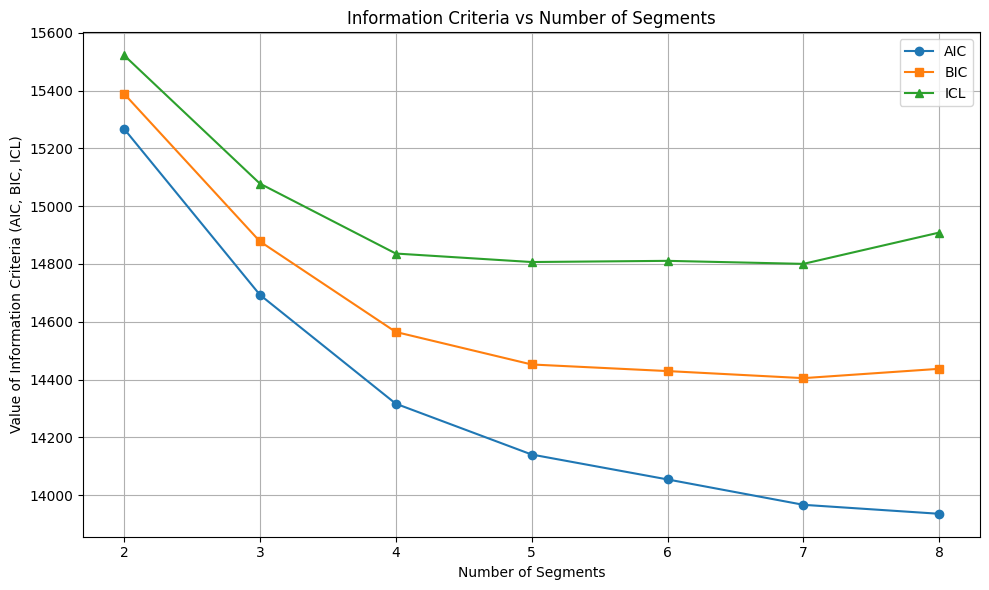

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

info_criteria = pd.DataFrame({
    'k': [2, 3, 4, 5, 6, 7, 8],
    'AIC': [15267.70, 14693.07, 14316.29, 14140.41, 14054.22, 13966.38, 13935.28],
    'BIC': [15389.17, 14877.92, 14564.52, 14452.01, 14429.20, 14404.73, 14437.01],
    'ICL': [15522.10, 15077.96, 14835.95, 14806.54, 14810.65, 14800.16, 14908.52]
})

plt.figure(figsize=(10, 6))
plt.plot(info_criteria['k'], info_criteria['AIC'], marker='o', label='AIC')
plt.plot(info_criteria['k'], info_criteria['BIC'], marker='s', label='BIC')
plt.plot(info_criteria['k'], info_criteria['ICL'], marker='^', label='ICL')
plt.xlabel("Number of Segments")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Information Criteria vs Number of Segments")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

kmeans_labels = [0, 1, 2, 3, 0, 1, 2, 3]
mixture_labels = [1, 0, 2, 3, 1, 0, 2, 3]

conf_mat = pd.crosstab(pd.Series(kmeans_labels, name="kmeans"),
                       pd.Series(mixture_labels, name="mixture"))

print(conf_mat)


mixture  0  1  2  3
kmeans             
0        0  2  0  0
1        2  0  0  0
2        0  0  2  0
3        0  0  0  2


In [ ]:
!pip install pomegranate


In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import pandas as pd
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
kmeans_labels = kmeans.fit_predict(md_x_bin)

kmeans2 = KMeans(n_clusters=4, random_state=5678, n_init=10)
mixture_labels = kmeans2.fit_predict(md_x_bin)

conf = confusion_matrix(kmeans_labels, mixture_labels)
row_ind, col_ind = linear_sum_assignment(-conf)

aligned_mixture_labels = np.zeros_like(mixture_labels)
for i, j in zip(col_ind, row_ind):
    aligned_mixture_labels[mixture_labels == i] = j

conf_df = pd.crosstab(pd.Series(kmeans_labels, name="kmeans"),
                      pd.Series(aligned_mixture_labels, name="mixture"))
print(conf_df)


mixture    0    1    2    3
kmeans                     
0        314    1   47    2
1          1  239    0    0
2          0    0  533    0
3          0    0    0  316


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = md_x_bin.to_numpy()
n_samples, n_features = X.shape
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
labels = kmeans.fit_predict(X)

probs = np.zeros((n_clusters, n_features))
for i in range(n_clusters):
    cluster_data = X[labels == i]
    p = cluster_data.mean(axis=0)
    probs[i] = np.clip(p, 1e-6, 1 - 1e-6)

log_likelihood = 0
for i in range(n_samples):
    cluster = labels[i]
    x = X[i]
    p = probs[cluster]
    log_prob = x * np.log(p) + (1 - x) * np.log(1 - p)
    log_likelihood += np.sum(log_prob)

print(f"Approximate Log-Likelihood: {log_likelihood:.3f}")


Approximate Log-Likelihood: -5324.043


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

like_map = {
    "I hate it!-5": -5,
    "-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "+5": 5,
    "I love it!+5": 5
}

data_mcdonald["Like_numeric"] = data_mcdonald["Like"].map(like_map)

data_mcdonald["Like_n"] = 6 - data_mcdonald["Like_numeric"]

like_counts = data_mcdonald["Like_numeric"].value_counts().sort_index(ascending=False)
print("Original Like values (reversed):")
print(like_counts)

like_n_counts = data_mcdonald["Like_n"].value_counts().sort_index()
print("\nTransformed Like_n values:")
print(like_n_counts)




Original Like values (reversed):
Like_numeric
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64

Transformed Like_n values:
Like_n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

like_map = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5
}
data_mcdonald["Like_num"] = data_mcdonald["Like"].map(like_map)

data_mcdonald["Like_n"] = 6 - data_mcdonald["Like_num"]

predictors = data_mcdonald.columns[:11].tolist()
formula_string = "Like_n ~ " + " + ".join(predictors)

print("Formula for modeling:")
print(formula_string)

model = smf.ols(formula=formula_string, data=data_mcdonald).fit()

print("\nLinear Regression Summary:")
print(model.summary())


Formula for modeling:
Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          4.03e-296
Time:                        06:55:55   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
mcdonalds = pd.read_csv(file_path)

like_order = [
    "I hate it!-5", "-4", "-3", "-2", "-1", "0",
    "+1", "+2", "+3", "+4", "I love it!+5"
]
like_numeric = dict(zip(like_order, range(11)))
mcdonalds["Like_n"] = mcdonalds["Like"].map(like_numeric)

X = pd.get_dummies(mcdonalds.iloc[:, 0:11], drop_first=True)
y = mcdonalds["Like_n"].astype(float).to_numpy()
X_np = X.to_numpy()

data = np.hstack((X_np, y.reshape(-1, 1)))

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(data)
cluster_labels = gmm.predict(data)

cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
print("Cluster sizes:")
for i, size in cluster_sizes.items():
    print(f"Cluster {i+1}: {size}")

print("\nRegression summary per cluster:")
for k in range(2):
    X_k = X_np[cluster_labels == k]
    y_k = y[cluster_labels == k]
    reg = LinearRegression().fit(X_k, y_k)
    print(f"Cluster {k+1} Coefficients:")
    for var, coef in zip(X.columns, reg.coef_):
        print(f"  {var}: {coef:.4f}")
    print(f"Intercept: {reg.intercept_:.4f}\n")


Cluster sizes:
Cluster 1: 1060
Cluster 2: 393

Regression summary per cluster:
Cluster 1 Coefficients:
  yummy_Yes: 2.0706
  convenient_Yes: 0.0000
  spicy_Yes: -0.4944
  fattening_Yes: -0.5010
  greasy_Yes: -0.3650
  fast_Yes: 0.2400
  cheap_Yes: 0.0656
  tasty_Yes: 1.3624
  expensive_Yes: 0.0112
  healthy_Yes: 0.4613
  disgusting_Yes: 0.0000
Intercept: 4.6627

Cluster 2 Coefficients:
  yummy_Yes: 3.2997
  convenient_Yes: 0.9480
  spicy_Yes: -0.0740
  fattening_Yes: 0.0518
  greasy_Yes: 0.0906
  fast_Yes: 0.4125
  cheap_Yes: -0.0054
  tasty_Yes: 1.3688
  expensive_Yes: -0.0361
  healthy_Yes: 0.3812
  disgusting_Yes: -1.9545
Intercept: 2.3869



In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

like_map = {
    "I hate it!-5": -5, "-4": -4, "-3": -3, "-2": -2, "-1": -1,
    "0": 0,
    "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!+5": 5
}
data_mcdonald["Like_num"] = data_mcdonald["Like"].map(like_map)
data_mcdonald["Like_n"] = 6 - data_mcdonald["Like_num"]

predictors = data_mcdonald.columns[:11].tolist()
formula_string = "Like_n ~ " + " + ".join(predictors)

model_refit = smf.ols(formula=formula_string, data=data_mcdonald).fit()

print(model_refit.summary())


                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          4.03e-296
Time:                        06:55:46   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.9242      0.28

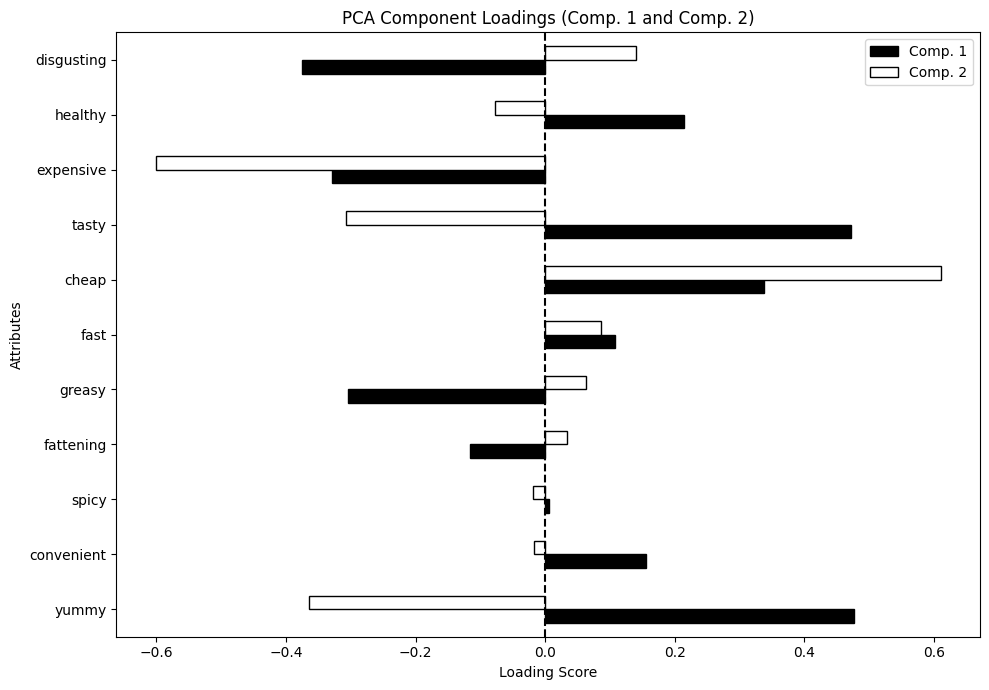

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

pca = PCA(n_components=2)
pca.fit(md_x_bin)

loadings = pd.DataFrame(pca.components_.T,
                        columns=["Comp. 1", "Comp. 2"],
                        index=md_x_bin.columns)

ax = loadings.plot(kind="barh", figsize=(10, 7), colormap="gray", edgecolor="black")
plt.axvline(x=0, color='black', linestyle='--')
plt.title("PCA Component Loadings (Comp. 1 and Comp. 2)")
plt.xlabel("Loading Score")
plt.ylabel("Attributes")
plt.tight_layout()
plt.show()


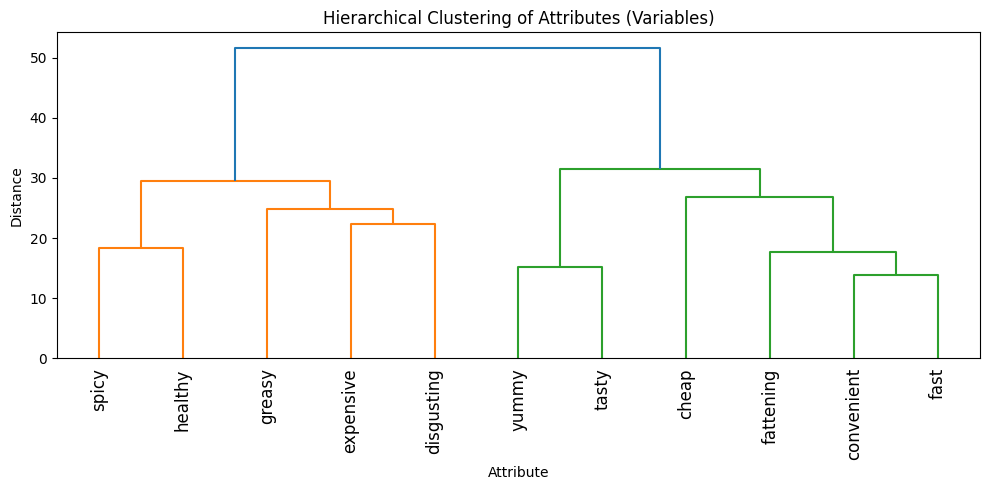

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

md_x_bin_T = md_x_bin.T

distance_matrix = pdist(md_x_bin_T, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=md_x_bin_T.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Attributes (Variables)")
plt.xlabel("Attribute")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

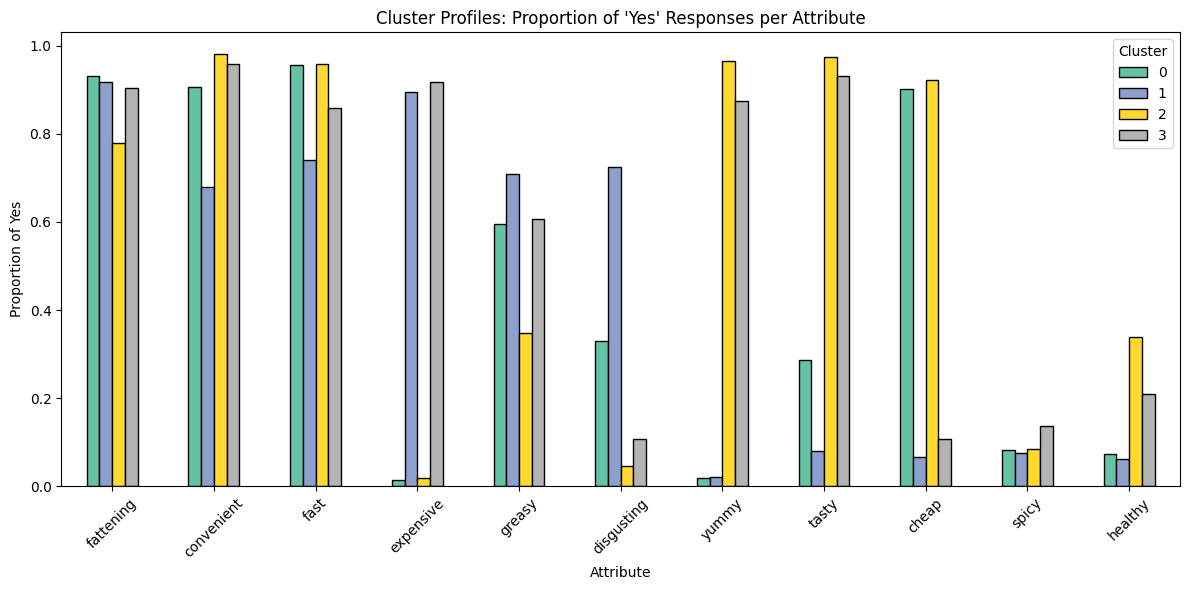

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
data_mcdonald['Cluster'] = kmeans.fit_predict(md_x_bin)

cluster_means = md_x_bin.copy()
cluster_means['Cluster'] = data_mcdonald['Cluster']
cluster_profile = cluster_means.groupby('Cluster').mean()

distance_matrix = pdist(cluster_profile.T, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_columns = [cluster_profile.columns[i] for i in dendro['leaves']]

plt.figure(figsize=(12, 6))
cluster_profile[ordered_columns].T.plot(kind='bar', figsize=(12, 6), colormap="Set2", edgecolor='black')

plt.title("Cluster Profiles: Proportion of 'Yes' Responses per Attribute")
plt.ylabel("Proportion of Yes")
plt.xlabel("Attribute")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


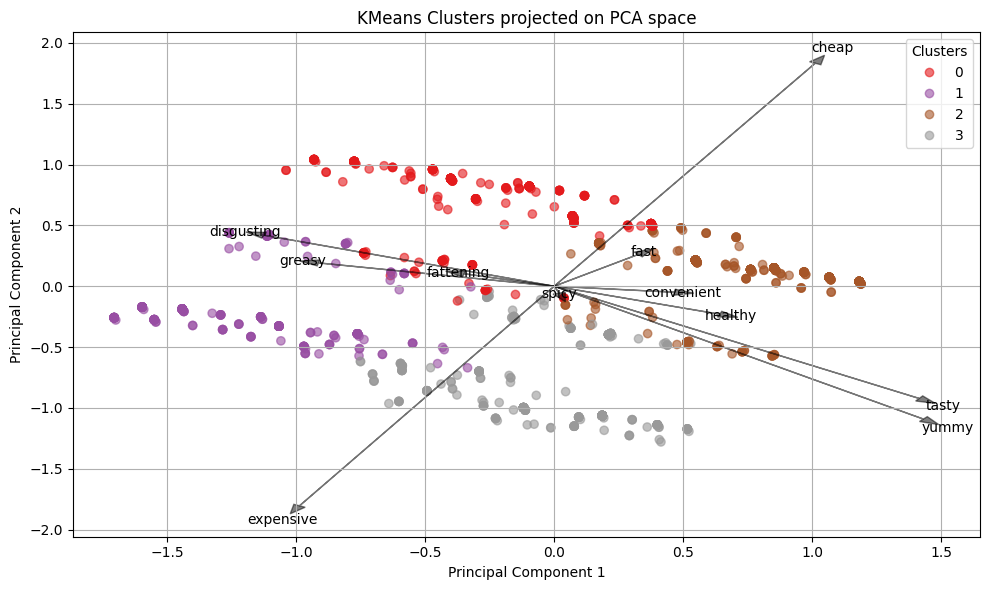

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(md_x_bin)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
labels = kmeans.fit_predict(md_x_bin)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='Set1', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters projected on PCA space")
plt.legend(*scatter.legend_elements(), title="Clusters")

loadings = pca.components_.T
for i, var in enumerate(md_x.columns):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='black', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='black', ha='center', va='center')

plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

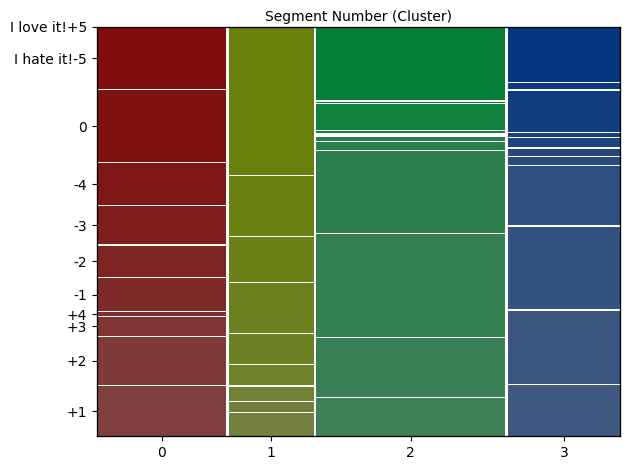

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(md_x_bin)

data_mcdonald['Cluster'] = cluster_labels
data_mcdonald['Like'] = data_mcdonald['Like'].astype(str)

cross_tab = pd.crosstab(data_mcdonald['Cluster'], data_mcdonald['Like'])

mosaic_input = {(str(row), str(col)): cross_tab.loc[row, col]
                for row in cross_tab.index
                for col in cross_tab.columns}

plt.figure(figsize=(12, 6))
mosaic(mosaic_input, title='', labelizer=lambda k: '', axes_label=True)
plt.xlabel("Segment Number (Cluster)")
plt.ylabel("Like Level")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

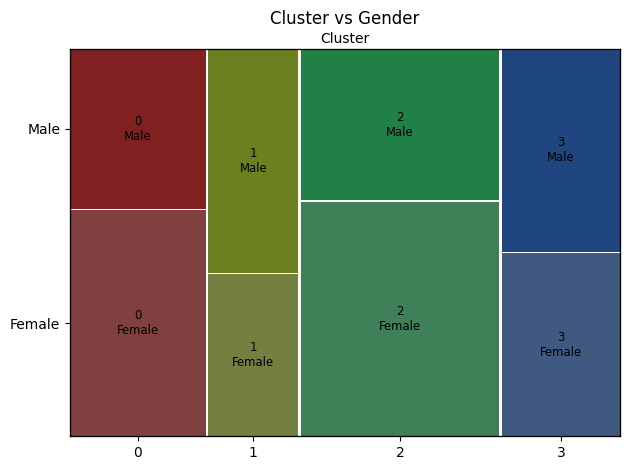

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

# Convert first 11 columns to binary
md_x_bin = (data_mcdonald.iloc[:, 0:11] == "Yes").astype(int)

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(md_x_bin)

# Add cluster labels to DataFrame
data_mcdonald["Cluster"] = cluster_labels

# Ensure Gender is string
data_mcdonald["Gender"] = data_mcdonald["Gender"].astype(str)

# Create contingency table
cross_tab = pd.crosstab(data_mcdonald["Cluster"], data_mcdonald["Gender"])

# Prepare data for mosaic plot
mosaic_input = {(str(row), str(col)): cross_tab.loc[row, col]
                for row in cross_tab.index
                for col in cross_tab.columns}

# Plot mosaic
plt.figure(figsize=(10, 6))
mosaic(mosaic_input, title="Cluster vs Gender", axes_label=True)
plt.xlabel("Cluster")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()


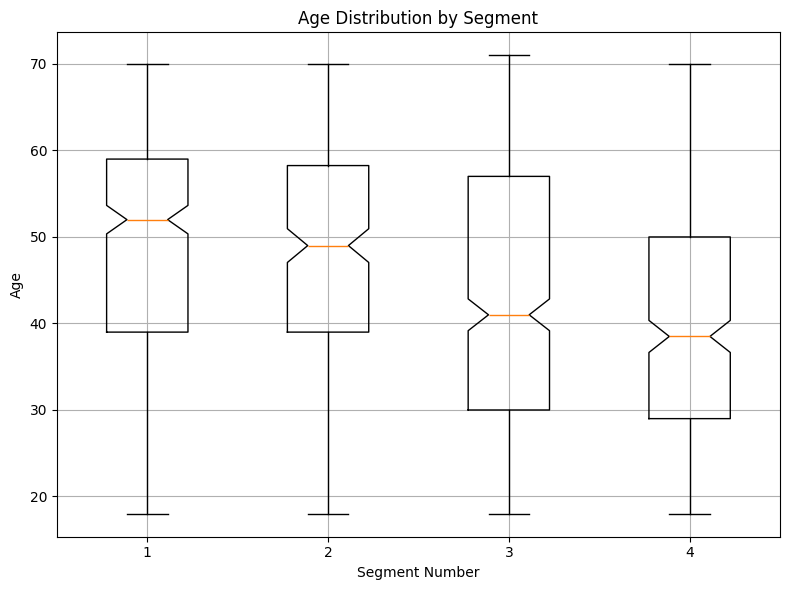

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
df = pd.read_csv(file_path)

md_x = df.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
df["Segment"] = kmeans.fit_predict(md_x_bin)

df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

age_by_segment = [df[df["Segment"] == i]["Age"].dropna() for i in range(4)]

plt.figure(figsize=(8, 6))
plt.boxplot(age_by_segment, notch=True, patch_artist=False)

plt.title("Age Distribution by Segment")
plt.xlabel("Segment Number")
plt.ylabel("Age")
plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
%load_ext rpy2.ipython


In [ ]:
%%R
install.packages("partykit")
library(partykit)

mcdonalds <- read.csv("/content/drive/MyDrive/ColabData/mcdonalds.csv")



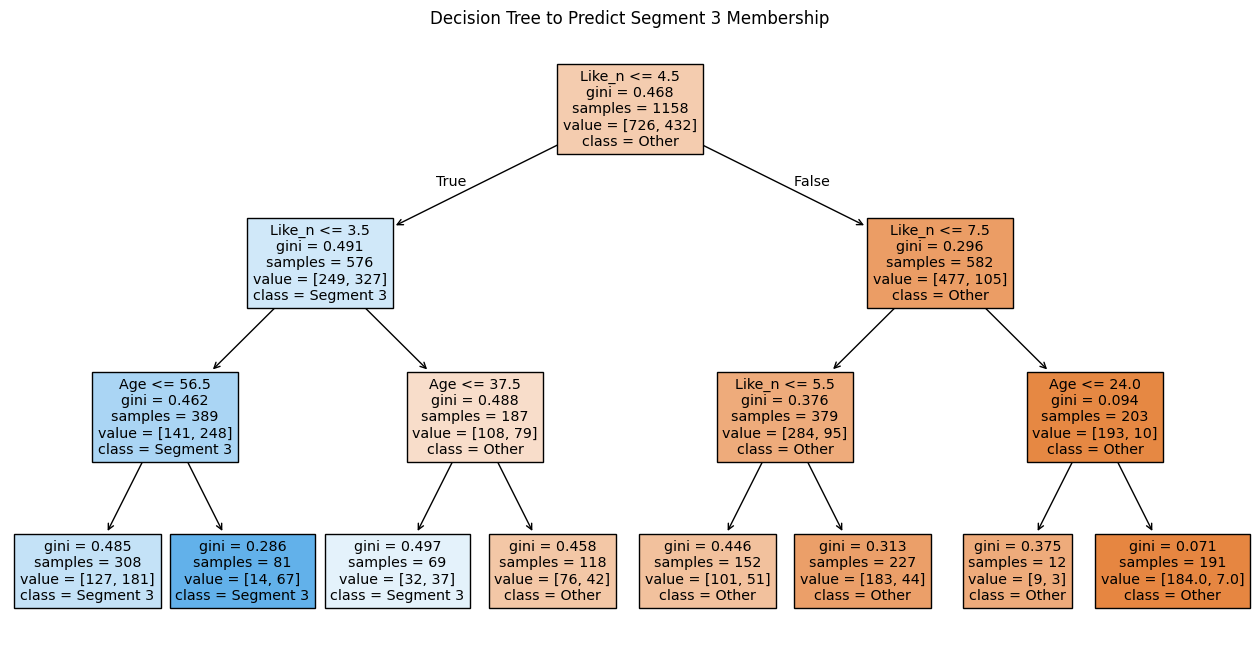

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
df = pd.read_csv(file_path)

md_x = df.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
df["Segment"] = kmeans.fit_predict(md_x_bin)

df["target_k4_3"] = (df["Segment"] == 2).astype(int)

df["Like_n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["VisitFrequency"] = df["VisitFrequency"].astype(str)
df["Gender"] = df["Gender"].astype(str)

df_encoded = pd.get_dummies(df[["Like_n", "Age", "VisitFrequency", "Gender"]])

df_model = df_encoded.copy()
df_model["target"] = df["target_k4_3"]
df_model = df_model.dropna()

X = df_model.drop("target", axis=1)
y = df_model["target"]

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X.columns, class_names=["Other", "Segment 3"], filled=True)
plt.title("Decision Tree to Predict Segment 3 Membership")
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
data_mcdonald = pd.read_csv(file_path)

md_x = data_mcdonald.iloc[:, 0:11]
md_x_bin = (md_x == "Yes").astype(int)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
data_mcdonald['Cluster'] = kmeans.fit_predict(md_x_bin)

data_mcdonald['VisitNumeric'] = data_mcdonald['VisitFrequency'].astype('category').cat.codes

visit_means = data_mcdonald.groupby('Cluster')['VisitNumeric'].mean().round(2)

print("Mean VisitFrequency (coded numerically) per cluster:")
print(visit_means)


Mean VisitFrequency (coded numerically) per cluster:
Cluster
0    2.73
1    2.69
2    2.60
3    2.55
Name: VisitNumeric, dtype: float64


In [ ]:

like_order = {
    "I hate it!-5": -5, "-4": -4, "-3": -3, "-2": -2, "-1": -1,
    "0": 0, "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!+5": 5
}
data_mcdonald["Like_num"] = data_mcdonald["Like"].map(like_order)
data_mcdonald["Like_n"] = 6 - data_mcdonald["Like_num"]

like_means = data_mcdonald.groupby("Cluster")["Like_n"].mean().round(2)

print("Mean Like.n score per cluster:")
print(like_means)


Mean Like.n score per cluster:
Cluster
0    7.18
1    8.67
2    3.17
3    3.83
Name: Like_n, dtype: float64


In [ ]:

data_mcdonald["Is_Female"] = (data_mcdonald["Gender"] == "Female").astype(int)

female_proportions = data_mcdonald.groupby("Cluster")["Is_Female"].mean().round(2)

print("Proportion of Females in each cluster:")
print(female_proportions)


Proportion of Females in each cluster:
Cluster
0    0.59
1    0.42
2    0.61
3    0.47
Name: Is_Female, dtype: float64


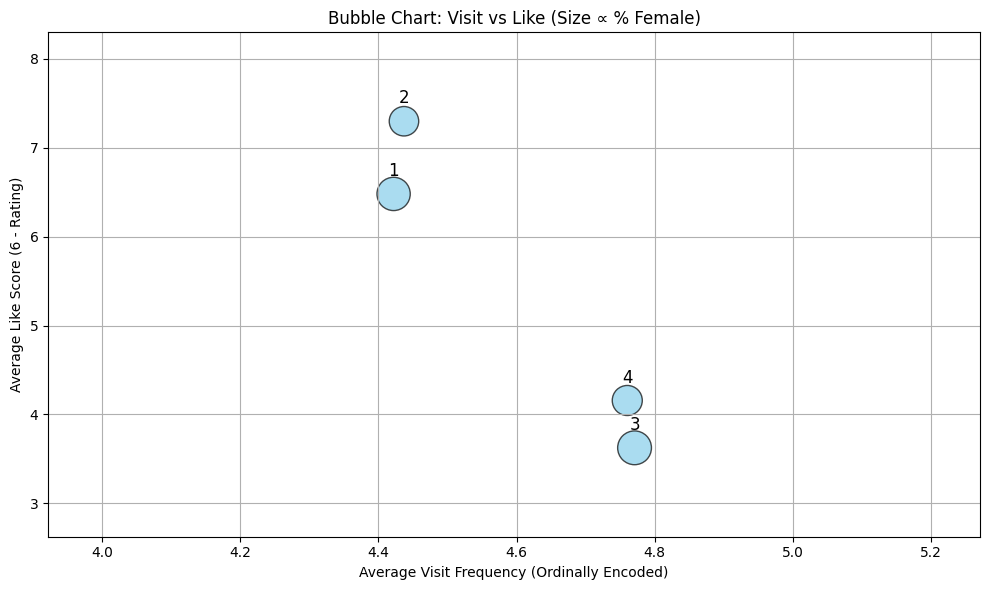

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
file_path = "/content/drive/MyDrive/ColabData/mcdonalds.csv"
df = pd.read_csv(file_path)

md_x = df.iloc[:, :11]
md_x_bin = (md_x == "Yes").astype(int)

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
df["Segment"] = kmeans.fit_predict(md_x_bin)

df["Like_n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")
df["VisitFrequency"] = df["VisitFrequency"].astype(str)
df["Gender"] = df["Gender"].astype(str)

df_clean = df.dropna(subset=["Like_n", "VisitFrequency", "Gender", "Segment"]).copy()


unique_visits = df_clean["VisitFrequency"].value_counts().index.tolist()
visit_map = {val: i+1 for i, val in enumerate(reversed(unique_visits))}

df_clean["VisitNumeric"] = df_clean["VisitFrequency"].map(visit_map)

df_clean = df_clean.dropna(subset=["VisitNumeric"])

visit = df_clean.groupby("Segment")["VisitNumeric"].mean()
like = df_clean.groupby("Segment")["Like_n"].mean()
female_pct = df_clean.groupby("Segment")["Gender"].apply(lambda x: (x == "Female").mean() * 100)

plt.figure(figsize=(10, 6))
plt.scatter(
    visit, like,
    s=female_pct * 10,
    color='skyblue', edgecolors='black', alpha=0.7
)

for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y + 0.2, f"{i + 1}", ha='center', fontsize=12)

plt.xlim(visit.min() - 0.5, visit.max() + 0.5)
plt.ylim(like.min() - 1, like.max() + 1)
plt.xlabel("Average Visit Frequency (Ordinally Encoded)")
plt.ylabel("Average Like Score (6 - Rating)")
plt.title("Bubble Chart: Visit vs Like (Size ∝ % Female)")
plt.grid(True)
plt.tight_layout()
plt.show()
